### Import Packages

In [41]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [42]:
DATA_PATH = "datasets/heart.csv"
RAND_STATE_VALUE = 42

### Dataset Selection
• Choose a real dataset suitable for a classification task. Ensure that the dataset has a
clear target variable that you want to predict.

In [43]:
df = pd.read_csv(DATA_PATH)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Preprocessing
• Handle missing values, encode categorical variables if necessary, and split the dataset
into features (X) and the target variable (y).
• Split the data into training and testing ser part of the Jupyter notebook

In [44]:
df.isna().sum() / (len(df) * 100)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [46]:
X = df.drop("target", axis = 1)
y = df["target"]

In [47]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

numerical_pipe = Pipeline(
    steps = [
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ("num", numerical_pipe, numerical_features)
    ]
)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = RAND_STATE_VALUE)

### Model Selection
• Implement three classification algorithms: K-Nearest Neighbors (KNN), Logistic
Regression, and Support Vector Machine (SVM).
• Train each model on the training set.

In [49]:
SCORING_TYPE = "f1"
CV_VALUE = 5

#### K-Nearest Neighbors (KNN)

In [50]:
knn_pipe = Pipeline(
    steps = [
        ("preprocess", preprocessor),
        ("classifier", KNeighborsClassifier())
    ]
)

knn_param_grid = {
    "classifier__n_neighbors": [3, 5, 7, 9]
}

knn_grid_search = GridSearchCV(knn_pipe, knn_param_grid, cv = CV_VALUE, scoring = SCORING_TYPE)

knn_grid_search.fit(X_train, y_train)

knn_best_params = knn_grid_search.best_params_
# best_estimator = knn_grid_search.best_estimator_

print(knn_best_params)

{'classifier__n_neighbors': 3}


#### Logistic Regression

In [51]:
lr_pipe = Pipeline(
    steps = [
        ("preprocess", preprocessor),
        ("classifier", LogisticRegression())
    ]
)

lr_param_grid = {
    "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["lbfgs", "liblinear"]
}

lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv = CV_VALUE, scoring = SCORING_TYPE)

lr_grid_search.fit(X_train, y_train)

lr_best_params = lr_grid_search.best_params_
# best_estimator = lr_grid_search.best_estimator_

print(lr_best_params)

{'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


#### Support Vector Machine (SVM)

In [52]:
svm_pipe = Pipeline(
    steps = [
        ("preprocess", preprocessor),
        ("svm", SVC())
    ]
)

svm_param_grid = {
    "svm__C": [0.1, 1, 10],
    "svm__kernel": ["linear", "rbf", "poly"],
    "svm__gamma": ["scale", "auto", 0.1, 1]
}

svm_grid_search = GridSearchCV(svm_pipe, svm_param_grid, cv = CV_VALUE, scoring = SCORING_TYPE)

svm_grid_search.fit(X_train, y_train)

svm_best_params = svm_grid_search.best_params_
# best_estimator = svm_grid_search.best_estimator_

print(svm_best_params)

{'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}


### Hyperparameter Tuning:
• Use grid search to find the best hyperparameters for each algorithm.

In [53]:
def replace_key_prefix(input_dict: dict, prefix: str) -> dict:
    result_dict = {}
    
    for key, value in input_dict.items():
        if key.startswith(prefix + "__"):
            new_key = key[len(prefix) + 2:]
            result_dict[new_key] = value
        else:
            result_dict[key] = value
    
    return result_dict

In [54]:
knn_best_params = replace_key_prefix(knn_best_params, "classifier")

model_knn = Pipeline(
    steps = [
        ("preprocess", preprocessor),
        ("classifier", KNeighborsClassifier(**knn_best_params))
    ]
)

model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [55]:
lr_best_params = replace_key_prefix(lr_best_params, "classifier")

model_lr = Pipeline(
    steps = [
        ("preprocess", preprocessor),
        ("classifier", LogisticRegression(**lr_best_params))
    ]
)

model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('classifier',
                 LogisticRegression(C=100, penalty='l1', solver='liblinear'))])

In [56]:
svm_best_params = replace_key_prefix(svm_best_params, "svm")

model_svm = Pipeline(
    steps = [
        ("preprocess", preprocessor),
        ("svm", SVC(**svm_best_params))
    ]
)

model_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalach', 'oldpeak'])])),
                ('svm', SVC(C=10, gamma=1))])

### Model Evaluation:
• Evaluate the performance of each model using appropriate metrics (e.g., accuracy,
precision, recall, F1-score). Compare the results to identify the best-performing model.


              precision    recall  f1-score   support

           0     0.9156    0.8868    0.9010       159
           1     0.8831    0.9128    0.8977       149

    accuracy                         0.8994       308
   macro avg     0.8994    0.8998    0.8993       308
weighted avg     0.8999    0.8994    0.8994       308



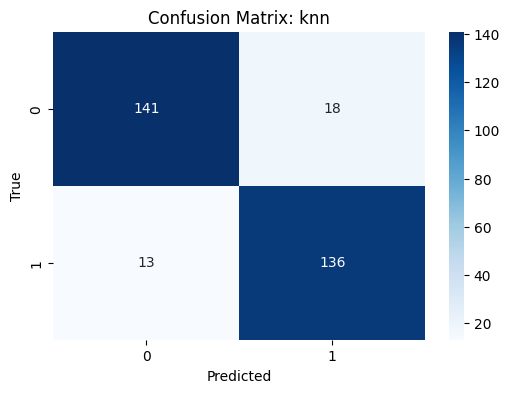

              precision    recall  f1-score   support

           0     0.6974    0.6667    0.6817       159
           1     0.6603    0.6913    0.6754       149

    accuracy                         0.6786       308
   macro avg     0.6788    0.6790    0.6785       308
weighted avg     0.6794    0.6786    0.6786       308



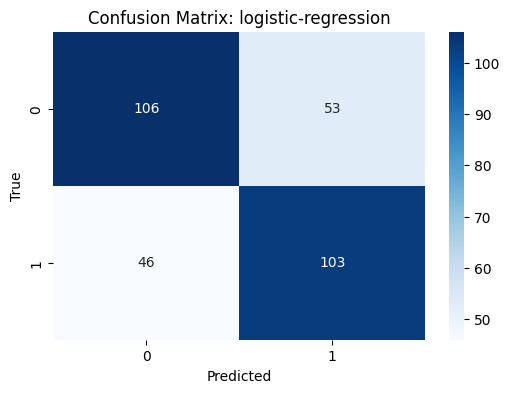

              precision    recall  f1-score   support

           0     0.9461    0.9937    0.9693       159
           1     0.9929    0.9396    0.9655       149

    accuracy                         0.9675       308
   macro avg     0.9695    0.9667    0.9674       308
weighted avg     0.9687    0.9675    0.9675       308



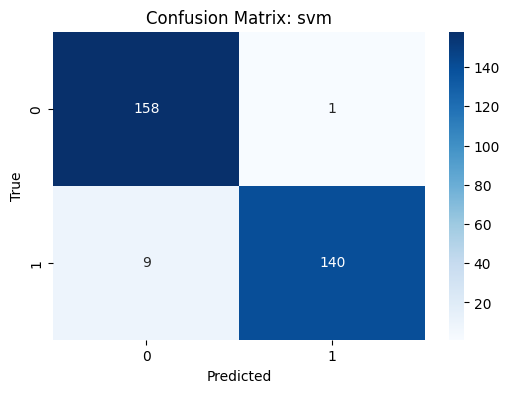

In [57]:
models = [model_knn, model_lr, model_svm]
model_names = ["knn", "logistic-regression", "svm"]
accuracy_scores = []

for index, model in enumerate(models):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    
    summary_eval = classification_report(y_test, y_pred, digits = 4)
    print(summary_eval)
    
    cm = confusion_matrix(y_test, y_pred)
    
    model_name = model_names[index]
    
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")

    plt.savefig(f"pictures/confusion-matrix-{model_name}.png")
    
    plt.show()

df_accuracy = pd.DataFrame({
    "model": model_names,
    "accuracy": accuracy_scores
})

### Select Best Model:
• Choose the classification model that achieved the highest performance based on your
evaluation metrics.


In [58]:
df_accuracy.sort_values("accuracy", ascending = False)

,model,accuracy
2,svm,0.967532
0,knn,0.899351
1,logistic-regression,0.678571


### Save the Model:
• Save the selected model along with its optimized hyperparameters to a file using an
appropriate serialization method (e.g., joblib or pickle).


In [59]:
import os
import joblib

In [60]:
model_path = "./models/"
model_filename = "model-svm-tuned.pkl"
file_loc = os.path.join(model_path, model_filename)

joblib.dump(model_svm, file_loc)

print(f"Model saved to: {file_loc}")

Model saved to: ./models/model-svm-tuned.pkl


### Streamlit Deployment
• Create a Streamlit application to deploy the selected and optimized classification model.
• Allow users to input features for prediction and display the model’s classification result.
• Ensure the Streamlit app is interactive and user-friendly.


### Documentation
• Provide documentation that includes a brief overview of the problem, dataset description, model selection rationale, hyperparameter tuning details, and instructions on how
to use the Streamlit app.


### Submission
• Submit the following:
– The Jupyter notebook or script containing your code.
– The saved model file.
– Documentation as a separate document or part of the Jupyter notebook